## Model Test with some Random samples

In [1]:
#Import the required library 
import numpy as np
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)

# Print the parent directory
print("Parent Directory:", parent_dir)

Parent Directory: E:\upgrade_capston_project-main


In [3]:
#Build the path for required directories
random_samples_to_test_model_dir = parent_dir+'/datasets/random_samples_to_test_model/'
model_dir = parent_dir+'/models/'

In [4]:
# Load the saved model from file
with open(os.path.join(model_dir,'RESNET50_xgbClassifier_model.pkl'), 'rb') as f:
    xgb_clf = pickle.load(f)

In [5]:
# create model for feature engineering on test data to make it feasible for trained model
resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [6]:
#create empty list to store the predictions
result =[]

In [7]:
# Function to preprocess and predict the data
def preprocess_and_predict(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img_features = resnet_model.predict(x)
    img_features = np.array(img_features)
    y_pred = xgb_clf.predict(img_features)
    result.append(y_pred)

In [8]:
 for filename in (os.listdir(random_samples_to_test_model_dir)):
            img_path = os.path.join(random_samples_to_test_model_dir, filename)
            preprocess_and_predict(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 859ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step


In [9]:
class_name = ['defective','good']

In [10]:
numberOfFiles = len(os.listdir(random_samples_to_test_model_dir))

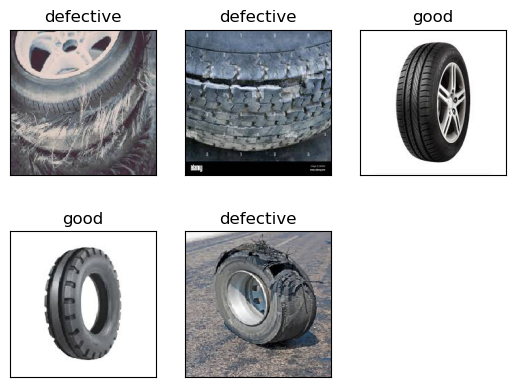

In [11]:
#Plot the test data and its predictions :
for i, filename in enumerate(os.listdir(random_samples_to_test_model_dir)):
            img_path = os.path.join(random_samples_to_test_model_dir, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            ax = plt.subplot(numberOfFiles//2,numberOfFiles-(numberOfFiles//2),i+1)
            plt.imshow(img)
            plt.title(class_name[result[i].item()]) 
            plt.xticks([])
            plt.yticks([])
            